# Learning horizontal model

In [39]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [154]:
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 7.5

In [136]:
import cPickle
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, Adam

from sklearn.metrics import mean_squared_error

import vicon_anim_parser.scene_drawer as sd
import Learning.data_cleaning as dc

In [138]:
%pylab inline

from matplotlib import pyplot as plt
from matplotlib import animation
#plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\'

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim, fps=120):
    if not hasattr(anim, '_encoded_video'):
        anim.save("test.mp4", fps=fps, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])

        video = open("test.mp4","rb").read()

    anim._encoded_video = video.encode("base64")
    return VIDEO_TAG.format(anim._encoded_video)

from IPython.display import HTML

def display_animation(anim, fps=120):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim, fps=fps))

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [18]:
import cPickle
segment_id2parent_id, header = cPickle.load(open(".\\Learning\\data_horizontal\\skeleton_info"))
print header

['Head', 'Head_End', 'Hips', 'LeftArm', 'LeftFoot', 'LeftForeArm', 'LeftHand', 'LeftHandEnd', 'LeftHandThumb1', 'LeftHandThumb2', 'LeftLeg', 'LeftShoulder', 'LeftToeBase', 'LeftToeEnd', 'LeftUpLeg', 'RightArm', 'RightFoot', 'RightForeArm', 'RightHand', 'RightHandEnd', 'RightHandThumb1', 'RightHandThumb2', 'RightLeg', 'RightShoulder', 'RightToeBase', 'RightToeEnd', 'RightUpLeg', 'Spine', 'SwordSegment']


In [16]:
#concatenating data
def load_horizontal():
    cmn_path = ".\\Learning\\data_horizontal\\"
    file_names = ["center_left_fast1.npz", "center_left_slow1.npz", "center_right_fast1.npz", "center_right_slow1.npz",
                  "left_center_fast1.npz", "left_center_slow1.npz", "right_center_fast1.npz", "right_center_slow1.npz",
                  "slow_center_right_fast1.npz"]
    
    mouse_input_seq = tuple()
    anim_output_seq = tuple()
    
    for file_name in file_names:
        data_tmp = np.load(cmn_path + file_name)
        mouse_input_tmp, anim_output_tmp = data_tmp['arr_0'], data_tmp['arr_1']
        
        mouse_input_seq += (mouse_input_tmp,)
        anim_output_seq += (anim_output_tmp,)
        
        print mouse_input_tmp.shape, anim_output_tmp.shape
        
    mouse_input = np.concatenate(mouse_input_seq, axis=0)
    anim_output = np.concatenate(anim_output_seq, axis=0)
    return mouse_input, anim_output

#load_horizontal()
mouse_input, anim_output = load_horizontal()
print "overall mouse input", mouse_input.shape
print "overall anim output", anim_output.shape

(80L, 2L) (80L, 87L)
(120L, 2L) (120L, 87L)
(110L, 2L) (110L, 87L)
(285L, 2L) (285L, 87L)
(185L, 2L) (185L, 87L)
(70L, 2L) (70L, 87L)
(170L, 2L) (170L, 87L)
(160L, 2L) (160L, 87L)
(178L, 2L) (178L, 87L)
overall mouse input (1358L, 2L)
overall anim output (1358L, 87L)


In [143]:
anim_data = map(dc.convert_pose_vector_to_segments, anim_output)
display_animation(sd.get_segments_anim(anim_data, segment_id2parent_id, mouse_curve=mouse_input, scene_length=1300))

frame number 500


frame number 1000


<video controls>
 <source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQADdVltZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY5NCAzYjcwNjQ1IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTkg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTI1IHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAa
42WIhAAn//71sXwKasnzigzoMi7hlyTJrrfj4CvRFTadD8XX3rHPXtW8NoCXC0faScGhFbN6g/8O
XnZDvA7See1eJjqnMeUEM+ImYADhwVwVnnEWP9RREqJQdTzSMqR9cVJbg0ivSXYNBF6+ubus/16q
Lr9ACmaZacRv6UmYOTc1hkiPl2JfC2WnLUv5iNsJtcY4oz285G36/g2e2jVx+n39TxFyb5nAOPLA
Op9GUlknT4n6329JQCyqdTdYyBJmdnO12ioSHiwaKB1IHToTmNdKQ2DoxSfr/6CeTh2E2S0R1V7o
t5gaudKOTljNCixTI9qhB6Mu4Q0fQ5lcdOT4du3bs9n8mSVy6dctNTifOUrT+N6dCL+QUJZ/xUof
4KbWJNDSFXQsGE6EzDGsjhhryT+JWlljEdHIPMCtU5YmYsSbFnwmOtaPwkipHFr40sPoCpROQNPa
2CKfQhAaoQwj0ED6D8xDpTp35YMyWvl9G6ak4TkRIPe7pr3H6ZAAAg1eHvII2VfoIDT5gAAEoAKG
jiaOQawz/tlHMqnOpOKai/Auwr00mu0vJEF9xkyiA4bSrvh6oCCaNpbltbygLnCdUwsz6MRNsKz0
nLiXU1icL/PvMxixqWNYwSa76PzO7uLEBYNsmJKX8TR/vm8jjaj4Fqo+RDI49xXhYza6LEowSKn5
iqPivDA9uK5JYth3bSv0t/4GtanwgN28L0htZZBjVjcgJwKFY0xF3wPtCwqI1MLhMPRsqZxiIdl0
rituqWMVkfmRxDYFWb5GI7BcGMOoZdhrc2Ji9UcOqNsUCUSYI4tPAWFmqxIuIKFuUl0n3iWa6w9u
s0Afgz5vhnbSnjDBip9jRBhwc3wTausybZAzXceTOoc8qcaYLmYoZNs5ubLFq2ZiMsER5vYjd/cW
ZLPoJFL9dDzg8QbEVL0eGXt7PjplnQjAvryCNbJvIJV/kHt0OnjlX8A870tgAyuU3itEe/42sIVI
QsVwb8ky6I+VIgOnxZP0DYnReNN9wuFpgsn5NfVZdlUyWfHu+0kq4N67EzYiFqpAk15SsOYlNrkF
PMgz3xWbJzUTrrX1Ihhs/gs9JG739kMEd6/AgiQ68NnvTLZiARCYJSTIsfIXYVsJCfOUmoBsgUva
w0oUyNJwcV44mi4DuNGPnzC0+vQoyNczXN4T13NvXLoajezKBJsVQAAogunx6zeLeYPhexF2G8Kl
dyQ4LuA4Kq6APS1AP9qvzl6es4Vu8pjd6It93C/MvU5f71K3BIdw4i1Acz5QurqHqlPB7EKkxZmd
JfYYpLD9m+y0HnpCivrVtCIXWJG3b12uKvJm4A/gjGf0YI+E9ZUmb8K1K4+tLKNxY5QPMUXvoqaj
knNMteXFmK4+Ez3g6r6vLpGxAp3eqsCSGydsKKNbGMrBrpqAZYcFX9P2okqVaTor52uQYq3KLYwv
lg5Xv/HGcN8raowrnyPKz6fYQg9mn0rN0FYsplJQzRmnsQk8ClvL8uc3Hv+xpO84uUey5c3qHCXo
hr8prkpYx8av97OJDEsRgZ+GORFCqrw2YwItoXRwbLoOKSifjzDhijJD/EFLNN/RGNKno4MaqL+r
LiZozxTIJ417hJv6GT8YbP5MgdUJjvx+RHzM7m3YaOOLiBdKCbftU1KBciETusIQXyhMxCepz6KY
oFV7t76vv2arVJwlENqEcFO0i0x6e94A9yEbwBcY8MhMUcAtbs/wWuJ7e3jWKxJEW2lU0H5XH31U
WvzVGXEB5mQ5lPV2tevpqmeM7Ka92lwbMPP0Xg+WAaIQtnyCDGnbKsA+ZNb5D0j2ryXhruXlnQK0
8kIGhFR9I5SXpmU7i3FN5nkkPGIJ7l7wiw8+6DO0sSEDJOnQVnSkKRtCGOdatqvzOz71W2se9uHX
mq7FEbDGtW9m5L8JulxL7ITn7gmG6yEYageQ9l5rVPjtspkmBpNsrjNw9MIZGET8MWNBAfSj3gmt
2y0rkLqlMLgCdvzAhnpmNg9ytXlx0ZxlYEX2sKx71W1aHloFruxbPueP+w0pYZ9NIqI4VXtAAvBI
jvNehW8bLhCwsVWeB7YYvH0MftdmpQL7PE8/nZ4MD0HyZLBzM9uTEPOcruQ3L5nGq10af6PnjW5Y
+TBsckkiP1pswjjAeotJPSVujGqLznfQj+/MmJZvu9vP/8t3vL0u877uwXFmkEnAHWbkC/aS0mOm
cspKMUrhcJqJuvhww/b+dsyKk6772g7mTDcgcXEz/Ze5hLSZrBaK5DjIvUpEbOBvc8LxTnOouLI0
BzJmocPA3KQgV9IArBdNBtYq1ZwXsFAhuBCrUsIjiuXvCwsefeHacUHK/g3Z5kM3Or/F3Jsx1uYj
VtAi6j+Y2e0tDSTR+btmS7TwDstYmz6sjUVbFR9/9SpZ53ig5Ea4vDFSjX0+S4Fdz1ykb+p6TuBG
pd+7FQ2UnjqoYBrk9wHmNqUf5fnkQafsT4NaJY2qCD2Wx962PEsOgiMkQepspg1m6dErZXHXODox
+Tmmu4ypkU77xQK967dtMUgP1n087KvUBb4gXn2PXOFA4LDpV6cxOymW6e/GBSUttI2d4vuP4mjE
KvhZJJl/VDhZP4qGDsdtEmy42Ea+A3AMKo7c4Y23G0YOjlJgMiko84+U2+e8c/suZZ8xfZHnwlSD
lQODOxrPQdKXq2yBW+WrWjcc0J0hC6TtWHJrGcPjqCVW5fhK8hdBg5qHXda4ge4PHlnrWAM2qxXg
vRNo9X85jNuLrYbew8X9eklQYPnD4mf8kawW5pOkVf7hUhzeTsbslFO0867bmvmNZbwQZ0xArVJJ
l3wbkv8prezTzFXWvoUMFQUedR0ZiyZKB0eazDDXxWuxHU0GBpMvUMrbTbvCD3g2exl0Ovvn6eu1
A0sXax77HLquUH4aXM

In [30]:
anim_output_mean = np.mean(anim_output, axis=0)
anim_output_std = np.std(anim_output, axis=0)

print anim_output_mean.shape
print anim_output_std.shape

N = mouse_input.shape[0]
D = anim_output_mean.shape[0]

print N, D

print anim_output_mean
print np.dot(np.ones((N, 1)), anim_output_mean.reshape(1, D)).shape

anim_output_norm = anim_output - np.dot(np.ones((N, 1)), anim_output_mean.reshape(1, D))
anim_output_norm = anim_output / np.dot(np.ones((N, 1)), anim_output_std.reshape(1, D))

print anim_output_norm.shape
print anim_output_norm[0]
print anim_output[0]

(87L,)
(87L,)
1358 87
[   32.45532227    10.1849165     41.59594727    46.54712677   150.97644043
    70.02295685    46.34906387    13.64997196    46.34906387   -38.12133789
    23.57521057    38.01751328    -4.02902937   -78.92167664    37.6568222
    18.7793293    169.61112976   -60.75337601  -193.48365784  -238.09681702
  -193.48365784  -199.08033752    22.74919128    38.01751328    26.42466736
   -47.17026901    45.53510666    55.72564697  -298.6940918    -30.81933403
   -13.03646755    12.57606506  -160.1945343   -160.47279358  -248.93595886
  -288.27148438  -314.5425415   -288.27148438  -249.47850037  -130.78187561
   -25.39254379  -146.24188232  -142.84364319   -82.17929077   111.3041153
   154.18473816   229.94248962   202.7571106    208.44126892   202.7571106
   156.72172546   124.23274994   -25.39254379   174.66207886   186.72840881
   107.33156586    -8.11551571   148.693573    1528.79699707  1639.7956543
   977.32897949  1402.27563477    81.50195312  1127.51745605   873.716

In [94]:
#specifying learning model

#  Splitting Data
I = np.arange(N)
np.random.shuffle(I)
n = int(N * 0.95)

## Training sets
xtr = mouse_input[I][:n]
ttr = anim_output_norm[I][:n]
## Testing sets
xte = mouse_input[I][n:]
tte = anim_output_norm[I][n:]

def get_naive_3x_model():
    model = Sequential()    # Feedforward
    model.add(Dense(100, input_dim=2))
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dense(87))
    model.compile('adam', 'mse')

naive_3x_model = get_naive_3x_model()  
cPickle.dump((xtr, ttr, naive_3x_model), open("./Learning/tmp/cur_learning_model.pkl", "w"))
print "done"

done


In [71]:
#first frame of test data
def display_pose_vector(pose_vector_norm):
    pose_vector = pose_vector_norm * anim_output_std + anim_output_mean
    pose_data = dc.convert_pose_vector_to_segments(pose_vector)
    sd.SegmentsDrawer.show_pose(pose_data, segment_id2parent_id, scene_length=1800, view_angle_horiz=180)

(87L,)


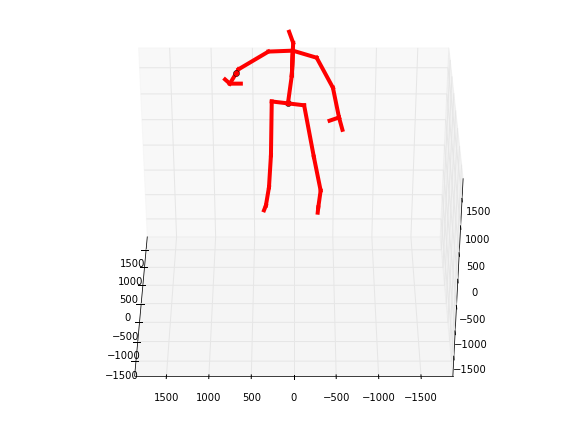

In [95]:
pose_vector_norm = tte[0]
print pose_vector_norm.shape
display_pose_vector(pose_vector_norm)

In [96]:
hist, naive_3x_model = cPickle.load(open("./Learning/tmp/cur_trained_model.pkl"))

[ 0.98464149 -0.0068151 ]
(1L, 87L)
(87L,)


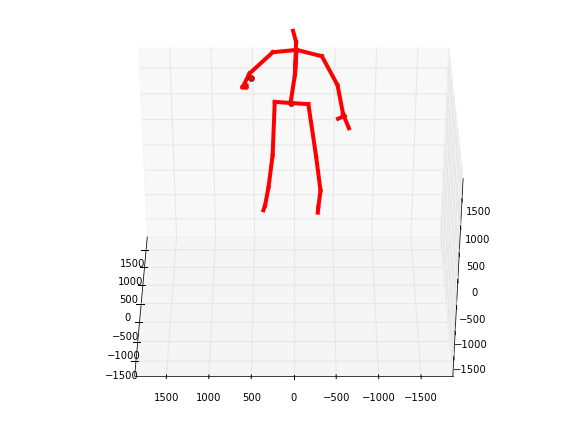

In [97]:
def display_first_test():
    print xte[0]
    pred = naive_3x_model.predict(xte[0].reshape(1, 2))
    print pred.shape
    pred = pred.reshape(D)
    print pred.shape
    display_pose_vector(pred)
    
display_first_test()

(1L, 87L)
(87L,)


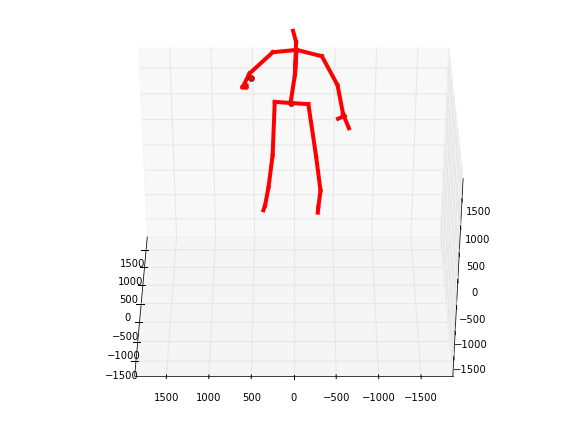

asdf2


In [158]:
def display_naive_3x_model_custom(mouse_input_single):
    custom_pred = naive_3x_model.predict(np.array(mouse_input_single).reshape(1, 2))
    print custom_pred.shape
    custom_pred = custom_pred.reshape(D)
    print custom_pred.shape
    display_pose_vector(custom_pred)
    
#display_naive_3x_model_custom([ 0.98464149, -0.0068151 ])
display_model_custom(naive_3x_model, [ 0.98464149, -0.0068151 ])
print "asdf2"

(1L, 87L)
(87L,)


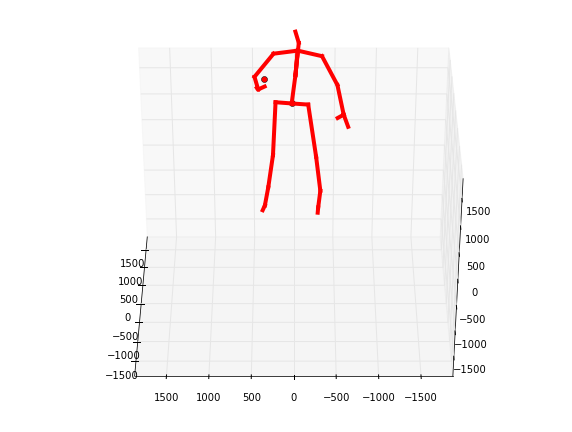

In [104]:
display_naive_3x_model_custom([ 0.00464149, -0.0068151 ])

(1L, 87L)
(87L,)


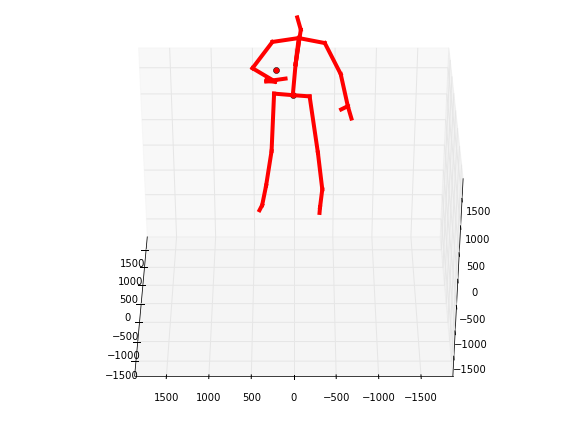

In [105]:
display_naive_3x_model_custom([-1,1])

[-0.94080615 -0.24726124]


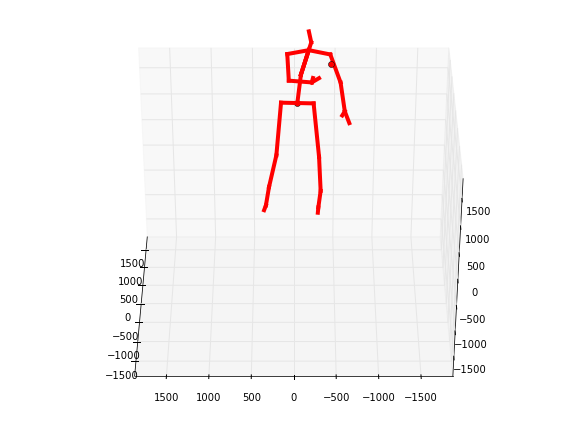

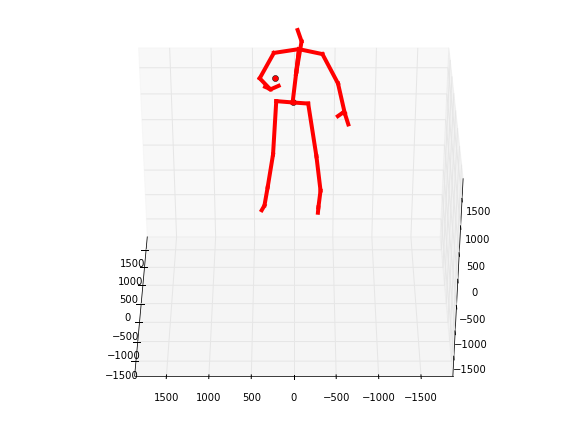

error for data_id 69: 5.06194718652


In [106]:
data_id = 69
print mouse_input[data_id]
display_pose_vector(anim_output_norm[data_id])
mouse_input_for_model = mouse_input[data_id].reshape(1,2)
model_output = naive_3x_model.predict(mouse_input_for_model).reshape(D)
display_pose_vector(model_output)
print "error for data_id {0}:".format(data_id), mean_squared_error(anim_output_norm[data_id], model_output)

In [167]:
#saving naive_3x_model
cPickle.dump(naive_3x_model, open("./Learning/models/naive_3x_model.p", "w"))

In [168]:
print("test error naive_3x_model:", mean_squared_error(tte, naive_3x_model.predict(xte)))

('test error:', 1.4056182138372351)


In [147]:
def get_rl_model_x3():
    from keras.regularizers import l2
    reg_value = 0.01
    model = Sequential()    # Feedforward
    model.add(Dense(100, input_dim=2, W_regularizer=l2(reg_value)))
    model.add(Activation('relu'))
    model.add(Dense(100, W_regularizer=l2(reg_value)))
    model.add(Activation('relu'))
    model.add(Dense(100, W_regularizer=l2(reg_value)))
    model.add(Activation('relu'))
    model.add(Dense(87,  W_regularizer=l2(reg_value)))
    model.compile('adam', 'mse')
    
    #hist = model.fit(xtr, ttr, validation_split=0.1, nb_epoch=45, batch_size=32, verbose=0)
    return model

rl_model_x3 = get_rl_model_x3()

In [148]:
#cPickle.dump(("rl_model_x3", xtr, ttr, rl_model_x3), open("./Learning/tmp/cur_learning_model.pkl", "w"))
with(open("./Learning/tmp/cur_learning_model.json", "w")) as f:
    f.write(rl_model_x3.to_json())
    print "done"

done


naive_3x_model: 1.7829, 1.7635
| Model  | validation error  | test error  | number of epoches  |
|---|---|---|---|
| naive_3x_model  | 1.7829  | 1.7635  | 25  |
| get_rl_model_x3 |   |   |   |

In [150]:
hist, rl_model_x3 = cPickle.load(open("./Learning/tmp/cur_trained_model.pkl"))

(1L, 87L)
(87L,)


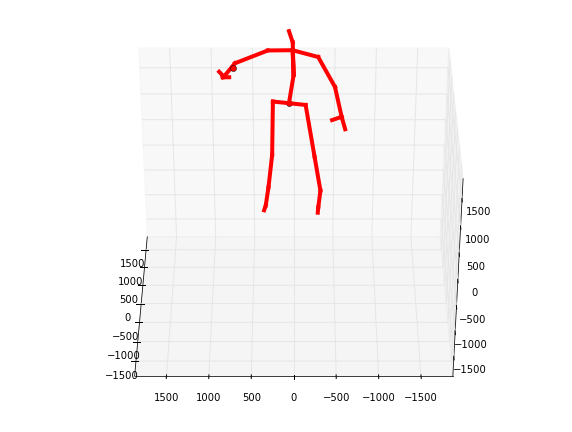

hello rl_model_x3


In [166]:
def display_model_custom(model, mouse_input_single):
    custom_pred = model.predict(np.array(mouse_input_single).reshape(1, 2))
    print custom_pred.shape
    custom_pred = custom_pred.reshape(D)
    print custom_pred.shape
    display_pose_vector(custom_pred)
    
display_model_custom(rl_model_x3, [ 0.98464149, -0.0068151 ])
print "hello rl_model_x3"

In [170]:
print("test error rl_model_x3:", mean_squared_error(tte, rl_model_x3.predict(xte)))

('test error rl_model_x3:', 0.5818015491011167)


In [ ]:
cPickle.dump(rl_model_x3, "./Learning/models/naive_3x_model.pkl")